# Pandas and Spotify Data

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
from scipy.stats import ttest_ind
import seaborn as sns
drive.mount('content')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at content


## Goals this week.

- Look at a dataframe, and perform some descriptive statistics.
- Discuss some types of data analysis. Specifically, we will discuss:
 * means
 * medians
 * standard deviations
 * linear regressions
 * t-tests
 * an intro to plotting
 

 ### Importing Pandas

 First, we need to import pandas. We should also import some data!

In [ ]:
beyonce = pd.read_csv("content/MyDrive/python_scratch/spotify_data/beyonce.csv") 

Alright! Now our data is available in a dataframe.

We can look at the whole thing by typing in `beyonce`, or we can get a brief look at it by typing in `print(beyonce)`.

In [ ]:
print(beyonce)

     Unnamed: 0 artist_name  ... mode_name  key_mode
0             1     Beyoncé  ...     major   B major
1             2     Beyoncé  ...     minor  C# minor
2             3     Beyoncé  ...     minor   F minor
3             4     Beyoncé  ...     major   C major
4             5     Beyoncé  ...     minor   A minor
..          ...         ...  ...       ...       ...
433         434     Beyoncé  ...     major  F# major
434         435     Beyoncé  ...     minor   F minor
435         436     Beyoncé  ...     minor   B minor
436         437     Beyoncé  ...     major   F major
437         438     Beyoncé  ...     major   E major

[438 rows x 40 columns]


For an even more succinct (and possibly more helpful) view of the dataframe, the `.info` function can be used. 

In [ ]:
beyonce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    438 non-null    int64  
 1   artist_name                   438 non-null    object 
 2   artist_id                     438 non-null    object 
 3   album_id                      438 non-null    object 
 4   album_type                    438 non-null    object 
 5   album_images                  438 non-null    object 
 6   album_release_date            438 non-null    object 
 7   album_release_year            438 non-null    int64  
 8   album_release_date_precision  438 non-null    object 
 9   danceability                  438 non-null    float64
 10  energy                        438 non-null    float64
 11  key                           438 non-null    int64  
 12  loudness                      438 non-null    float64
 13  mode 

There are some methods and attributes associated with Pandas objects that allow for us to more easily retrieve information. The most commonly used ones are:


* `.head()`
* `.tail()`


With these, you can get the first or last `n` rows of a dataframe. Unlike unix, in which the default is 10, the default in Pandas is 5.





In [ ]:
## shows the last 5 rows:
beyonce.tail()

,Unnamed: 0,artist_name,artist_id,album_id,album_type,album_images,album_release_date,album_release_year,album_release_date_precision,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,analysis_url,time_signature,artists,available_markets,disc_number,duration_ms,explicit,track_href,is_local,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
433,434,Beyoncé,6vWDO969PvNqNYHIOW5v0m,25hVFAxTlDvXbx2X2QkUkE,album,"list(height = c(640, 300, 64), url = c(""https:...",2003,2003,year,0.619,0.4020,6,-8.054,1,0.0915,0.334,0.0,0.177,0.489,99.947,29W4t00Bj5uBwmtuphAhyY,https://api.spotify.com/v1/audio-analysis/29W4...,4,"list(href = ""https://api.spotify.com/v1/artist...","c(""AT"", ""CH"", ""DE"", ""LI"")",1,293106,False,https://api.spotify.com/v1/tracks/29W4t00Bj5uB...,False,Dangerously In Love,https://p.scdn.co/mp3-preview/aa580bad422a1e7d...,12,track,spotify:track:29W4t00Bj5uBwmtuphAhyY,https://open.spotify.com/track/29W4t00Bj5uBwmt...,Dangerously In Love (Alben für die Ewigkeit),F#,major,F# major
434,435,Beyoncé,6vWDO969PvNqNYHIOW5v0m,25hVFAxTlDvXbx2X2QkUkE,album,"list(height = c(640, 300, 64), url = c(""https:...",2003,2003,year,0.693,0.0457,5,-20.803,0,0.8030,0.423,0.0,0.122,0.541,133.173,74LAP3swRIVaUFEcWi90Iv,https://api.spotify.com/v1/audio-analysis/74LA...,3,"list(href = ""https://api.spotify.com/v1/artist...","c(""AT"", ""CH"", ""DE"", ""LI"")",1,16360,False,https://api.spotify.com/v1/tracks/74LAP3swRIVa...,False,Beyoncé Interlude,https://p.scdn.co/mp3-preview/f3d6675d78a00d62...,13,track,spotify:track:74LAP3swRIVaUFEcWi90Iv,https://open.spotify.com/track/74LAP3swRIVaUFE...,Dangerously In Love (Alben für die Ewigkeit),F,minor,F minor
435,436,Beyoncé,6vWDO969PvNqNYHIOW5v0m,25hVFAxTlDvXbx2X2QkUkE,album,"list(height = c(640, 300, 64), url = c(""https:...",2003,2003,year,0.349,0.2650,11,-12.790,0,0.0542,0.904,0.0,0.241,0.311,93.615,1ABGVrP1QEzjMPfzM0KXKt,https://api.spotify.com/v1/audio-analysis/1ABG...,3,"list(href = ""https://api.spotify.com/v1/artist...","c(""AT"", ""CH"", ""DE"", ""LI"")",1,163706,False,https://api.spotify.com/v1/tracks/1ABGVrP1QEzj...,False,Gift from Virgo,https://p.scdn.co/mp3-preview/e7e629a306fd3438...,14,track,spotify:track:1ABGVrP1QEzjMPfzM0KXKt,https://open.spotify.com/track/1ABGVrP1QEzjMPf...,Dangerously In Love (Alben für die Ewigkeit),B,minor,B minor
436,437,Beyoncé,6vWDO969PvNqNYHIOW5v0m,25hVFAxTlDvXbx2X2QkUkE,album,"list(height = c(640, 300, 64), url = c(""https:...",2003,2003,year,0.683,0.7630,5,-6.588,1,0.1910,0.427,0.0,0.184,0.948,173.954,23npFplgR5Uuj5FwyVvy7h,https://api.spotify.com/v1/audio-analysis/23np...,4,"list(href = ""https://api.spotify.com/v1/artist...","c(""AT"", ""CH"", ""DE"", ""LI"")",1,246066,False,https://api.spotify.com/v1/tracks/23npFplgR5Uu...,False,Work It Out,https://p.scdn.co/mp3-preview/e9898d1c265ea607...,15,track,spotify:track:23npFplgR5Uuj5FwyVvy7h,https://open.spotify.com/track/23npFplgR5Uuj5F...,Dangerously In Love (Alben für die Ewigkeit),F,major,F major
437,438,Beyoncé,6vWDO969PvNqNYHIOW5v0m,25hVFAxTlDvXbx2X2QkUkE,album,"list(height = c(640, 300, 64), url = c(""https:...",2003,2003,year,0.515,0.7050,4,-7.924,1,0.3700,0.240,0.0,0.182,0.198,89.861,6IeECiLESgmQDy5IKt5tiA,https://api.spotify.com/v1/audio-analysis/6IeE...,4,"list(href = c(""https://api.spotify.com/v1/arti...",character(0),1,517120,False,https://api.spotify.com/v1/tracks/6IeECiLESgmQ...,False,'03 Bonnie & Clyde,NaN,16,track,spotify:track:6IeECiLESgmQDy5IKt5tiA,https://open.spotify.com/track/6IeECiLESgmQDy5...,Dangerously In Love (Alben für die Ewigkeit),E,major,E major


In [ ]:
#shows the first 3 rows:
beyonce.head(3)

,Unnamed: 0,artist_name,artist_id,album_id,album_type,album_images,album_release_date,album_release_year,album_release_date_precision,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,analysis_url,time_signature,artists,available_markets,disc_number,duration_ms,explicit,track_href,is_local,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
0,1,Beyoncé,6vWDO969PvNqNYHIOW5v0m,2UJwKSBUz6rtW4QLK74kQu,album,"list(height = c(640, 300, 64), url = c(""https:...",2014-11-24,2014,day,0.512,0.625,11,-6.764,1,0.0508,0.00308,0.000164,0.346,0.201,129.935,7lUA4P03AhwAw40JHkdyGr,https://api.spotify.com/v1/audio-analysis/7lUA...,4,"list(href = ""https://api.spotify.com/v1/artist...","c(""AD"", ""AR"", ""AT"", ""AU"", ""BE"", ""BG"", ""BO"", ""B...",1,257653,False,https://api.spotify.com/v1/tracks/7lUA4P03AhwA...,False,Pretty Hurts,https://p.scdn.co/mp3-preview/fd617af2cdf7ea1b...,1,track,spotify:track:7lUA4P03AhwAw40JHkdyGr,https://open.spotify.com/track/7lUA4P03AhwAw40...,BEYONCÉ [Platinum Edition],B,major,B major
1,2,Beyoncé,6vWDO969PvNqNYHIOW5v0m,2UJwKSBUz6rtW4QLK74kQu,album,"list(height = c(640, 300, 64), url = c(""https:...",2014-11-24,2014,day,0.436,0.534,1,-9.416,0,0.0773,0.10300,0.006430,0.507,0.325,122.822,7cioKB5CHVzk09SOtTyn0T,https://api.spotify.com/v1/audio-analysis/7cio...,4,"list(href = ""https://api.spotify.com/v1/artist...","c(""AD"", ""AR"", ""AT"", ""AU"", ""BE"", ""BG"", ""BO"", ""B...",1,369040,True,https://api.spotify.com/v1/tracks/7cioKB5CHVzk...,False,Haunted,https://p.scdn.co/mp3-preview/63fcd43b454b1dc9...,2,track,spotify:track:7cioKB5CHVzk09SOtTyn0T,https://open.spotify.com/track/7cioKB5CHVzk09S...,BEYONCÉ [Platinum Edition],C#,minor,C# minor
2,3,Beyoncé,6vWDO969PvNqNYHIOW5v0m,2UJwKSBUz6rtW4QLK74kQu,album,"list(height = c(640, 300, 64), url = c(""https:...",2014-11-24,2014,day,0.589,0.621,5,-6.902,0,0.0468,0.00969,0.001040,0.181,0.401,140.030,6jG2YzhxptolDzLHTGLt7S,https://api.spotify.com/v1/audio-analysis/6jG2...,4,"list(href = c(""https://api.spotify.com/v1/arti...","c(""AD"", ""AR"", ""AT"", ""AU"", ""BE"", ""BG"", ""BO"", ""B...",1,323480,True,https://api.spotify.com/v1/tracks/6jG2Yzhxptol...,False,Drunk in Love,https://p.scdn.co/mp3-preview/7052c45ae9298c38...,3,track,spotify:track:6jG2YzhxptolDzLHTGLt7S,https://open.spotify.com/track/6jG2YzhxptolDzL...,BEYONCÉ [Platinum Edition],F,minor,F minor



There are also some And attributes:


* `.columns`
* `.dtypes`
* `.shape`

With the  `.columns` function, you can access the column labels of the dataframe.

Using `.dtypes` returns the data types of each column in the dataframe.

The `.shape` function returns number of rows and columns in the dataframe.

In [ ]:
beyonce.columns


Index(['Unnamed: 0', 'artist_name', 'artist_id', 'album_id', 'album_type',
       'album_images', 'album_release_date', 'album_release_year',
       'album_release_date_precision', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_id', 'analysis_url',
       'time_signature', 'artists', 'available_markets', 'disc_number',
       'duration_ms', 'explicit', 'track_href', 'is_local', 'track_name',
       'track_preview_url', 'track_number', 'type', 'track_uri',
       'external_urls.spotify', 'album_name', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

In [ ]:
beyonce.dtypes


Unnamed: 0                        int64
artist_name                      object
artist_id                        object
album_id                         object
album_type                       object
album_images                     object
album_release_date               object
album_release_year                int64
album_release_date_precision     object
danceability                    float64
energy                          float64
key                               int64
loudness                        float64
mode                              int64
speechiness                     float64
acousticness                    float64
instrumentalness                float64
liveness                        float64
valence                         float64
tempo                           float64
track_id                         object
analysis_url                     object
time_signature                    int64
artists                          object
available_markets                object


In [ ]:
beyonce.shape

(438, 40)

## Picking out specific things.


`.iloc`, (integer location) can look up rows by position.

`.loc` can find columns by label or lookup.

In [ ]:
###finds the fourth row:

beyonce.iloc[3]

Unnamed: 0                                                                      4
artist_name                                                               Beyoncé
artist_id                                                  6vWDO969PvNqNYHIOW5v0m
album_id                                                   2UJwKSBUz6rtW4QLK74kQu
album_type                                                                  album
album_images                    list(height = c(640, 300, 64), url = c("https:...
album_release_date                                                     2014-11-24
album_release_year                                                           2014
album_release_date_precision                                                  day
danceability                                                                0.875
energy                                                                      0.434
key                                                                             0
loudness        

In [ ]:
## or a range:

beyonce.iloc[-1]

Unnamed: 0                                                                    438
artist_name                                                               Beyoncé
artist_id                                                  6vWDO969PvNqNYHIOW5v0m
album_id                                                   25hVFAxTlDvXbx2X2QkUkE
album_type                                                                  album
album_images                    list(height = c(640, 300, 64), url = c("https:...
album_release_date                                                           2003
album_release_year                                                           2003
album_release_date_precision                                                 year
danceability                                                                0.515
energy                                                                      0.705
key                                                                             4
loudness        

With `.loc` we can select columns based on both their row index and column name. For example:

In [ ]:
beyonce.loc[1:3, 'tempo']

1    122.822
2    140.030
3    120.065
Name: tempo, dtype: float64

We can find columns by names like so:

In [ ]:
beyonce_tempi = beyonce['tempo']
for i in beyonce_tempi:
  if i < 120:
    print("slow")
  else:
    print("fast")

In [ ]:
###or just find fast pieces:
tempo = beyonce['tempo']  
fast = beyonce[tempo > 160]
print(fast)

## Calculating Summary Statistics

Let's look at how to find some summary statistics first.

In [ ]:
## the mean "acousticness" in Beyonce.
beyonce["acousticness"].mean()


0.18018508515981732

In [ ]:
## the median "acousticness" in Beyonce.
beyonce["acousticness"].median()

0.0947

In [ ]:
beyonce[["tempo", "danceability", "acousticness"]].describe()

,tempo,danceability,acousticness
count,438.000000,438.000000,438.000000
mean,117.535203,0.579792,0.180185
std,32.090024,0.168656,0.210869
min,63.345000,0.143000,0.000066
25%,93.615000,0.467250,0.025875
50%,107.051000,0.576000,0.094700
75%,137.093500,0.709750,0.247000
max,200.053000,0.925000,0.904000


In [ ]:
## are Beyonce's "explicit" songs faster?
beyonce[["tempo", "explicit"]].groupby("explicit").mean()

,tempo
explicit,
False,117.232375
True,131.970000


In [ ]:
## do they differ in other ways?
beyonce.groupby("explicit").mean()

,Unnamed: 0,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,disc_number,duration_ms,is_local,track_number
explicit,,,,,,,,,,,,,,,,,,
False,223.622378,2007.983683,0.581019,0.645393,5.275058,-6.981506,0.731935,0.174589,0.180921,0.013613,0.244634,0.469716,117.232375,3.895105,1.146853,241044.209790,False,7.393939
True,23.000000,2013.444444,0.521333,0.550889,4.777778,-8.107333,0.555556,0.171011,0.145088,0.009180,0.325533,0.353178,131.970000,3.888889,1.222222,327531.555556,False,5.777778


In [ ]:
### does meter matter?
beyonce.groupby(["explicit", "time_signature"])["tempo"].mean()


explicit  time_signature
False     1                 125.738000
          3                 113.264684
          4                 118.316360
          5                  79.544625
True      3                 140.415000
          4                 130.914375
Name: tempo, dtype: float64

In [ ]:
# what are these counts, though?
beyonce.groupby(["explicit", "time_signature"])["tempo"].count()

explicit  time_signature
False     1                   5
          3                  38
          4                 378
          5                   8
True      3                   1
          4                   8
Name: tempo, dtype: int64

In [ ]:
## standard deviation 
beyonce["acousticness"].std()

0.21086927911388673

In [ ]:
tempo = beyonce['tempo']  
danceability = beyonce['danceability']  
tempo = tempo.values.reshape(-1, 1)  # values converts it into a numpy array
danceability = danceability.values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
estimate = linear_regressor.fit(tempo, danceability)  # perform linear regression
danceability_pred = linear_regressor.predict(tempo)  # make predictions


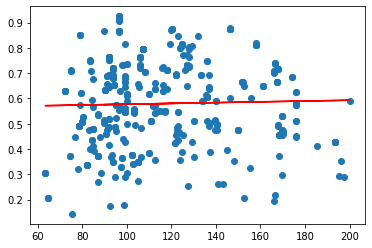

In [ ]:
plt.scatter(tempo, danceability)
plt.plot(tempo, danceability_pred, color='red')
plt.show()

In [ ]:
### using the stats toolkit (sm) we can get specifics of the model.
tempo_2 = sm.add_constant(tempo)
est = sm.OLS(danceability, tempo_2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3908
Date:                Mon, 29 Mar 2021   Prob (F-statistic):              0.532
Time:                        19:01:01   Log-Likelihood:                 158.80
No. Observations:                 438   AIC:                            -313.6
Df Residuals:                     436   BIC:                            -305.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5613      0.031     18.313      0.0

## Testing a hypothesis

Let's state a hypothesis:

H1: Beyonce's music becomes less "danceable" over time.

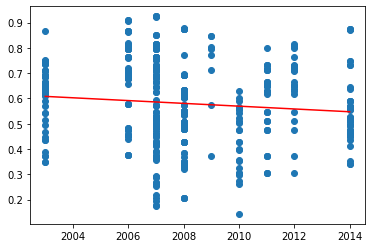

In [ ]:
year = beyonce['album_release_year'].values.reshape(-1,1)
danceability = beyonce['danceability'].values.reshape(-1,1)
linear_regressor = LinearRegression()  # create object for the class
estimate = linear_regressor.fit(year, danceability)  # perform linear regression
danceability_pred = linear_regressor.predict(year)  # make predictions
plt.scatter(year, danceability)
plt.plot(year, danceability_pred, color='red')
plt.show()

In [ ]:
### using the stats toolkit (sm) we can get specifics of the model.
tempo_2 = sm.add_constant(tempo)
est = sm.OLS(year, tempo_2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.600
Date:                Mon, 29 Mar 2021   Prob (F-statistic):              0.207
Time:                        19:02:50   Log-Likelihood:                -1094.0
No. Observations:                 438   AIC:                             2192.
Df Residuals:                     436   BIC:                             2200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2007.4426      0.535   3750.100      0.0

## Results:

We were not able to reject the null hypothesis.

Let's keep digging!

Is Beyonce's music faster than Taylor Swift's?

Ttest_indResult(statistic=array([-0.57972078]), pvalue=array([0.56223576]))

In [ ]:
taylor = pd.read_csv("content/MyDrive/python_scratch/spotify_data/taylor.csv") 

In [ ]:
beyonce_tempo = beyonce['tempo'].values.reshape(-1,1)
taylor_tempo = taylor['tempo'].values.reshape(-1,1)

In [ ]:

tset, pval = ttest_ind(beyonce_tempo, taylor_tempo)
print(f"the p-value is:{pval}, tset")
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("We are rejecting the null hypothesis. Hooray")
else:
  print("We are accepting null hypothesis that the distributions are not significantly different.")

the p-value is:[0.56223576], tset
We are accepting null hypothesis that the distributions are not significantly different.


In [ ]:
tempi = list(zip(taylor_tempo, beyonce_tempo))
df = pd.DataFrame(tempi, columns = ['Taylor', 'Beyonce'])

In [ ]:
print(df)

                   Taylor    Beyonce
0               [160.015]  [129.935]
1    [159.07299999999998]  [122.822]
2     [82.98899999999999]   [140.03]
3               [135.917]  [120.065]
4                [95.045]   [111.58]
..                    ...        ...
433   [96.03399999999999]   [99.947]
434  [108.76700000000001]  [133.173]
435  [100.02799999999999]   [93.615]
436              [61.867]  [173.954]
437   [95.48700000000001]   [89.861]

[438 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

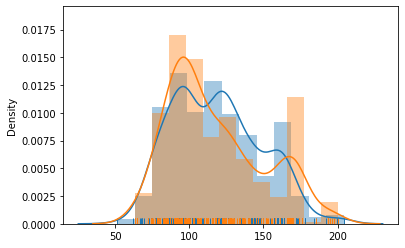

In [ ]:
sns.distplot(df[['Taylor']], hist=False, rug=True)
sns.distplot(df[['Beyonce']], hist=False, rug=True)


## Exercise

We've done a lot of things on a single object.

Wouldn't this be a good use of a class? How would we turn all of these ideas that we've just analyzed into a class?

In [78]:
### your code here.

class Compare_Data:

  def __init__(self, source1, source2):

    self.file_1 = pd.read_csv(source1)
    self.file_2 = pd.read_csv(source2)

  def plot_tempi(self):
    tempo1 = self.file_1["tempo"].values.reshape(-1,1)
    tempo2 = self.file_2["tempo"].values.reshape(-1,1)
    sns.distplot(df[[tempo1]], hist=False, rug=True)
    sns.distplot(df[[tempo2]], hist=False, rug=True)

 # def compare_danceability() :



In [79]:
comparison = Compare_Data("content/MyDrive/python_scratch/spotify_data/taylor.csv", "content/MyDrive/python_scratch/spotify_data/beyonce.csv")

In [80]:
comparison.plot_tempi()


1[[160.015]
 [159.073]
 [ 82.989]
 [135.917]
 [ 95.045]
 [128.07 ]
 [ 74.957]
 [ 92.027]
 [172.054]
 [110.01 ]
 [160.024]
 [120.085]
 [163.96 ]
 [163.954]
 [ 94.922]
 [ 93.061]
 [139.997]
 [126.068]
 [124.985]
 [157.043]
 [ 99.959]
 [178.013]
 [104.009]
 [ 77.318]
 [117.97 ]
 [163.886]
 [119.997]
 [ 74.957]
 [ 95.122]
 [121.034]
 [114.977]
 [129.962]
 [162.012]
 [124.894]
 [109.995]
 [171.791]
 [116.992]
 [100.163]
 [ 81.963]
 [ 96.006]
 [159.837]
 [ 92.008]
 [ 79.926]
 [114.984]
 [143.95 ]
 [117.935]
 [ 96.005]
 [ 73.849]
 [143.944]
 [ 80.007]
 [ 79.025]
 [146.147]
 [139.908]
 [128.057]
 [116.001]
 [118.986]
 [184.014]
 [ 92.673]
 [143.936]
 [126.014]
 [159.965]
 [ 67.303]
 [160.015]
 [172.909]
 [159.073]
 [ 98.753]
 [ 82.989]
 [ 86.424]
 [135.917]
 [ 85.319]
 [ 95.045]
 [ 77.411]
 [128.07 ]
 [123.703]
 [ 74.957]
 [ 76.531]
 [ 92.027]
 [129.971]
 [172.054]
 [ 83.407]
 [110.01 ]
 [129.863]
 [160.024]
 [100.283]
 [120.085]
 [130.302]
 [163.96 ]
 [ 68.253]
 [163.954]
 [130.315]
 [ 94.922